/tmp/ipykernel_70/2913786056.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


                                            count      mean      std  min  \
CONNECTION_activities_group_video_chat_pm                                   
No                                         4760.0  5.835714  2.41613  1.0   
Yes                                        4572.0  6.541557  2.18170  1.0   

                                           25%  50%  75%   max  
CONNECTION_activities_group_video_chat_pm                       
No                                         4.0  6.0  8.0  10.0  
Yes                                        5.0  7.0  8.0  10.0  


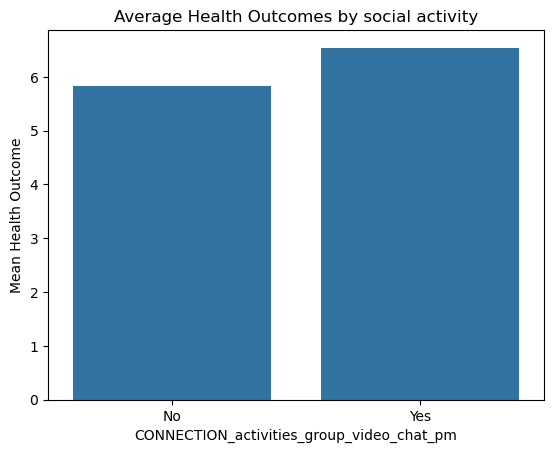

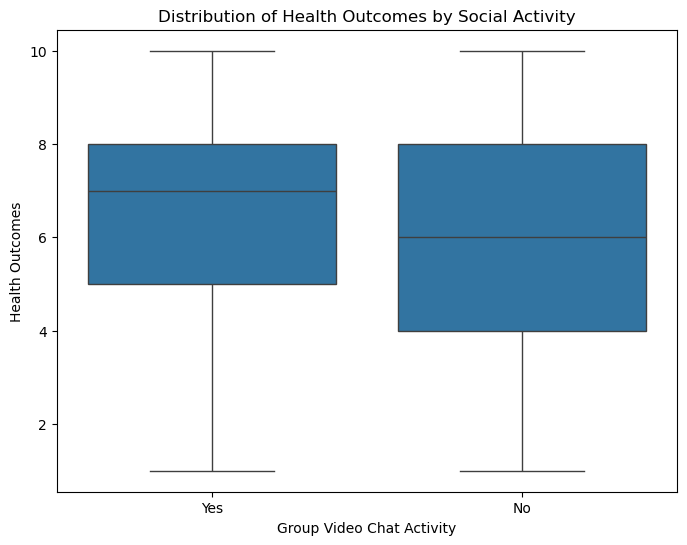

95% Confidence Interval: (0.613, 0.799)


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

database2 = df[['CONNECTION_activities_group_video_chat_pm', 'WELLNESS_life_satisfaction']].dropna()
database2['WELLNESS_life_satisfaction'] = pd.to_numeric(database2['WELLNESS_life_satisfaction'], errors='coerce')
stats = database2.groupby('CONNECTION_activities_group_video_chat_pm')['WELLNESS_life_satisfaction'].describe()
print(stats)
stats_means = database2.groupby('CONNECTION_activities_group_video_chat_pm')['WELLNESS_life_satisfaction'].mean().reset_index()

# Create bar plots
sns.barplot(x='CONNECTION_activities_group_video_chat_pm', y='WELLNESS_life_satisfaction', data = stats_means)
plt.title('Average Health Outcomes by social activity')
plt.ylabel('Mean Health Outcome')
plt.show()

# Create box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='CONNECTION_activities_group_video_chat_pm', y='WELLNESS_life_satisfaction', data=database2)
plt.title('Distribution of Health Outcomes by Social Activity')
plt.xlabel('Group Video Chat Activity')
plt.ylabel('Health Outcomes')
plt.show()


# bootstrapping
group1 = database2[database2['CONNECTION_activities_group_video_chat_pm'] == 'Yes']['WELLNESS_life_satisfaction']
group2 = database2[database2['CONNECTION_activities_group_video_chat_pm'] == 'No']['WELLNESS_life_satisfaction']
n_bootstraps = 10000
bootstrap_diffs = []
for _ in range(n_bootstraps):
    sample1 = np.random.choice(group1, size=len(group1), replace=True)
    sample2 = np.random.choice(group2, size=len(group2), replace=True)
    diff = np.mean(sample1) - np.mean(sample2)
    bootstrap_diffs.append(diff)
CI_lower = np.percentile(bootstrap_diffs, 2.5)
CI_upper = np.percentile(bootstrap_diffs, 97.5)
print(f"95% Confidence Interval: ({CI_lower:.3f}, {CI_upper:.3f})")